# Simulating $\pi$

The area of a circle $C$ is given as $|C| = \pi r^2$ with $r$ as the radius.

A square $S$ has area $|S| = w^2$ where $w$ is the length of a side of the square.

If we put a circle with radius $r$ inside of a square with edge $w=2r$ then the ratio of the areas is:

$$ratio = \frac{|C|}{|S|} = \frac{\pi r^2}{w^2} = \frac{\pi r^2}{(2r)^2}= \frac{\pi r^2}{4r^2} = \frac{\pi}{4} $$

Thus if we multiply the ratio of the areas by 4 we have a formula for $pi$:
$$ \pi = 4 ratio$$ 
or
$$ \pi = 4\frac{|C|}{|S|}$$



We can use this relationship to simulate the ratio of the areas to generate an estimate of $\pi$.

Basically we take uniform random draws of an $x$ and $y$ coordinate for a point and look at the share of many such points that fall within the circle of all those that are in the square.

We want to get within $p=0.00001$ of the value of $\pi$ that is reported in Python and we are curious as to how many points we have to draw to achieve this level of accuracy.

In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
pi = math.pi # our benchmark that we want to estimate using simulation

In [3]:
pi

3.141592653589793

## random.random()
Return the next random floating point number in the range [0.0, 1.0).

https://docs.python.org/3/library/random.html (learn to check function documents is very important)

In [9]:
n = 0 # number of points falling in the unit circle
d = 0 # number of points falling in the unit square
simulating = True # use as a sentinel
while simulating:
    x = random.random()
    y = random.random()
    if x**2 + y**2 <= 1.0:
        n += 1
    d += 1
    ratio = 4 * n * 1./d
#    print(ratio)
    if abs(ratio-pi) / pi <= 0.00001:
        print("Draws needed: ", d)
        break

Draws needed:  52053


In [10]:
n = 0
d = 0
ratios = []
xs = []
ys = []
simulating = True # use as a sentinel
while simulating:
    x = random.random()
    y = random.random()
    xs.append(x)
    ys.append(y)
    if x**2 + y**2 <= 1.0:
        n += 1
    d += 1
    ratio = 4 * n * 1./d
    
    print(ratio)
    ratios.append(ratio)
    if abs(ratio-pi) / pi <= 0.00001:
        print("Draws needed: ", d)
        break

0.0
2.0
2.6666666666666665
3.0
3.2
3.3333333333333335
3.4285714285714284
3.5
3.5555555555555554
3.6
3.6363636363636362
3.3333333333333335
3.076923076923077
3.142857142857143
2.933333333333333
3.0
2.823529411764706
2.888888888888889
2.9473684210526314
3.0
3.0476190476190474
2.909090909090909
2.782608695652174
2.8333333333333335
2.88
2.923076923076923
2.814814814814815
2.857142857142857
2.896551724137931
2.933333333333333
2.967741935483871
3.0
3.0303030303030303
3.0588235294117645
3.085714285714286
3.111111111111111
3.135135135135135
3.1578947368421053
3.1794871794871793
3.2
3.1219512195121952
3.142857142857143
3.1627906976744184
3.1818181818181817
3.2
3.217391304347826
3.234042553191489
3.25
3.2653061224489797
3.28
3.2941176470588234
3.230769230769231
3.2452830188679247
3.259259259259259
3.272727272727273
3.2857142857142856
3.2982456140350878
3.310344827586207
3.3220338983050848
3.3333333333333335
3.3442622950819674
3.3548387096774195
3.3015873015873014
3.3125
3.2615384615384615
3.27272

## Plot the first 10 $\pi$ estimation

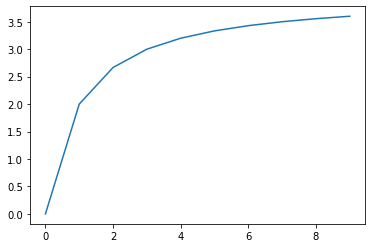

In [11]:
plt.plot(ratios[:10])

In [12]:
len(ratios)

5615

## Plot the first 500 $\pi$ estimation with min and max values of the estimation

(0.0, 3.6363636363636362)

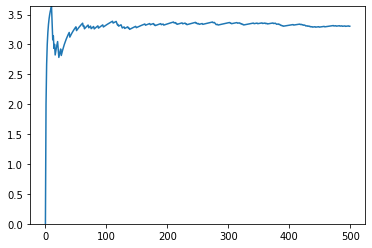

In [13]:
plt.plot(ratios[:500])
plt.ylim(min(ratios), max(ratios))

In [14]:
ratios[:10]

[0.0,
 2.0,
 2.6666666666666665,
 3.0,
 3.2,
 3.3333333333333335,
 3.4285714285714284,
 3.5,
 3.5555555555555554,
 3.6]

## Plot the entire $\pi$ estimation 

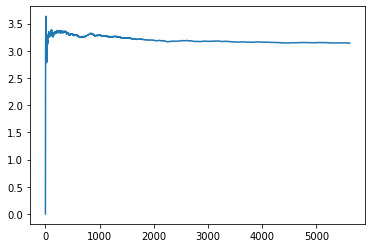

In [15]:
plt.plot(ratios)

## Getting User Input

In [17]:
input('enter')

enter 10


'10'

In [18]:
x = input('enter')

enter 100


In [19]:
x

'100'

In [20]:
type(x)

str

In [21]:
int(x)

100

In [22]:
float(x)

100.0

In [23]:
type(int(x))

int

In [24]:
type(float(x))

float

In [25]:
xf = float(x)

In [26]:
xf

100.0

In [1]:
import random
import math

# Prompt user for convergence criterion
convergence_criterion = float(input("Enter the convergence criterion (e.g., 0.0001): "))

# Prompt user for sentinel value
sentinel_value = int(input("Enter the sentinel value for the number of draws: "))

# True value of Pi
true_pi = math.pi

n = 0  # number of points falling in the unit circle
d = 0  # number of points falling in the unit square
simulating = True  # use as a sentinel

while simulating:
    x = random.random()
    y = random.random()
    if x**2 + y**2 <= 1.0:
        n += 1
    d += 1
    ratio = 4 * n * 1.0 / d

    # Check convergence criterion
    if abs(ratio - true_pi) / true_pi <= convergence_criterion:
        print("Convergence criterion met.")
        print("Pi estimate:", ratio)
        break

    # Check sentinel value
    if d >= sentinel_value:
        print("Draw limit was exceeded.")
        print("Pi estimate:", ratio)
        print("Percentage difference:", abs(ratio - true_pi) / true_pi * 100)
        break


Enter the convergence criterion (e.g., 0.0001): 0.00001  
Enter the sentinel value for the number of draws: 100
Draw limit was exceeded.
Pi estimate: 3.28
Percentage difference: 4.405642668283338
